In [ ]:
!git clone https://github.com/ltiufc/medusas_mrcnn.git . # baixa repositório na raiz do colab

In [8]:
import os
import cv2 as cv
import random

from resources import utils
from Configs.coco import CocoConfig
from model import MaskRCNN
from resources import visualize

In [ ]:
if not os.path.exists('./model.py') and os.path.exists('mrcnn'):
    raise ValueError("Arquivos e pastas da mrcnn não estão na raiz do colab!")

# Criação configuraçãõ para o modo de inferência

In [9]:
class InferenceConfig(CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    BATCH_SIZE = 1 # 1 imagem será lida por vez no predict
    DETECTION_MIN_CONFIDENCE = 0.75  # valor mínimo da probabilidade de uma classe


config = InferenceConfig()

# Criação das pastas caso não exista, e download dos pesos da COCO

In [11]:
LOG_PATH = "./logs"
IMAGE_DIR = "./Tests/images"   # diretório das imagens para inferência
if not os.path.exists(LOG_PATH):
    os.system('mkdir %s' % LOG_PATH)

if not os.path.exists(IMAGE_DIR):
    raise ValueError("Could not find image directory.")


COCO_PATH = os.path.join(LOG_PATH, 'mask_rcnn_coco.h5')
if not os.path.exists(COCO_PATH):
    utils.download_trained_weights()

# Criação do modelo da Mask R-CNN no modo inferência e cria o array com o nome das classes para ser exibido juntamente com as imagens

In [15]:
mrcnn = MaskRCNN('inference', config, './models')
mrcnn.load_weights(COCO_PATH, by_name=True)

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Carregamento das imagens para serem passadas na inferência

In [16]:
images = []
for filename in os.listdir(IMAGE_DIR):
    image = cv.imread(os.path.join(IMAGE_DIR, filename))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # converte para RGB pois a opencv sempre carrega imagens em BGR
    images.append(image)
print('Quantidade de imagens: {}'.format(len(images)))

Quantidade de imagens: 29


# Executa a inferência para cada imagem no dataset e as exibe

2022-08-10 18:54:29.085508: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -50 } dim { size: 256 } dim { size: 256 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } int_val: 7 } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2699 num_cores: 4 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 3145728 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { di

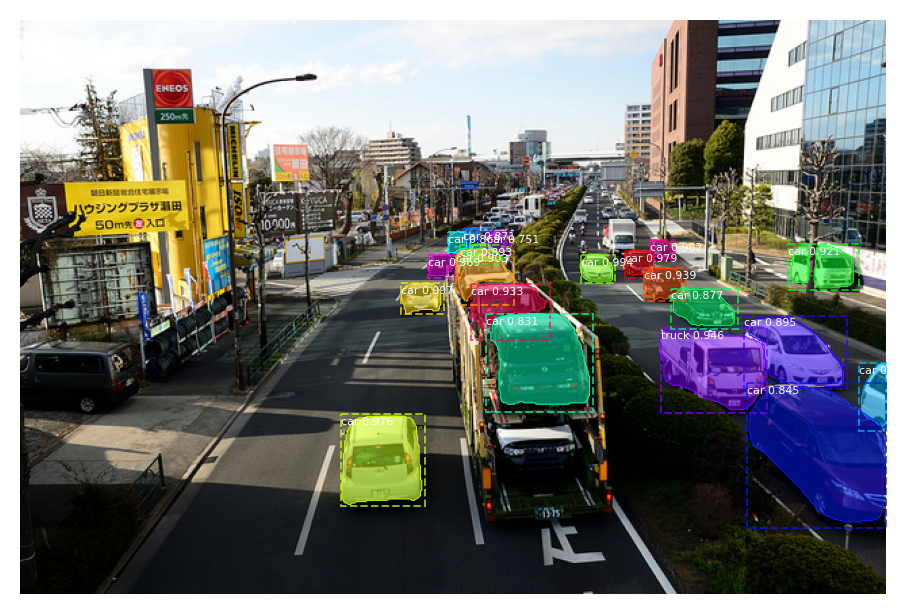

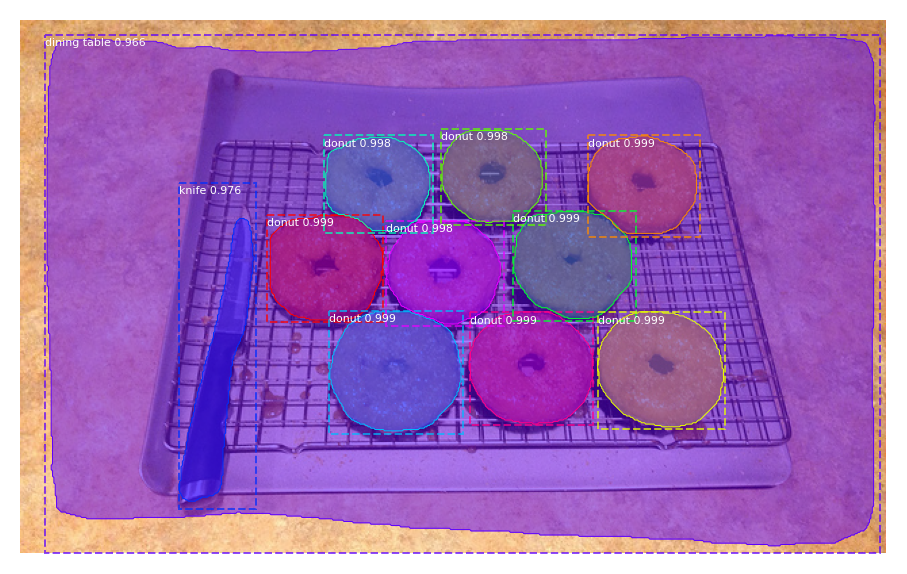

In [ ]:
for img in images:
    results = mrcnn.detect([img], verbose=0)
    r = results[0]

    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                class_names, r['scores'])